# Visualisierung Crowdfunding

In [1]:
# importieren relevanter Bibliotheken

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# bereinigten Datensatz importieren

df = pd.read_csv('crowdfunding_clean.csv', index_col = 0)

In [3]:
df.head()

funded_amount funded_cluster  funding_goal goal_cluster successful_funding  \
0            300     (200, 500]           300   (200, 500]      goal_achieved   
1            575    (500, 1000]           575  (500, 1000]      goal_achieved   
2            150     (100, 200]           150   (100, 200]      goal_achieved   
3            200     (100, 200]           200   (100, 200]      goal_achieved   
4            400     (200, 500]           400   (200, 500]      goal_achieved   

   success_factor             activity          sector  use_description  \
0             1.0  Fruits & Vegetables            Food                1   
1             1.0             Rickshaw  Transportation                1   
2             1.0       Transportation  Transportation                1   
3             1.0           Embroidery            Arts                1   
4             1.0           Milk Sales            Food                1   

    country partner_id  lender_count  count_male  count_female  \
0  Pakistan      247.0            12           0             1   
1  Pakistan      247.0            14           0             2   
2     India      334.0             6           0             1   
3  Pakistan      247.0             8           0             1   
4  Pakistan      245.0            16           0             1   

   count_initiators gender_initiators repayment_interval  
0                 1            female          irregular  
1                 2            female          irregular  
2                 1            female             bullet  
3                 1            female          irregular  
4                 1            female            monthly

# Ergebnisse

In [4]:
df.corr()

funded_amount  funding_goal  success_factor  \
funded_amount          1.000000      0.951356        0.077002   
funding_goal           0.951356      1.000000       -0.121122   
success_factor         0.077002     -0.121122        1.000000   
use_description        0.001062     -0.005642        0.011301   
lender_count           0.846231      0.801070        0.083625   
count_male             0.197733      0.209509       -0.071466   
count_female           0.471089      0.445504        0.045851   
count_initiators       0.484519      0.465588        0.017410   

                  use_description  lender_count  count_male  count_female  \
funded_amount            0.001062      0.846231    0.197733      0.471089   
funding_goal            -0.005642      0.801070    0.209509      0.445504   
success_factor           0.011301      0.083625   -0.071466      0.045851   
use_description          1.000000      0.001746   -0.001473     -0.002226   
lender_count             0.001746      1.000000    0.171947      0.265933   
count_male              -0.001473      0.171947    1.000000      0.169129   
count_female            -0.002226      0.265933    0.169129      1.000000   
count_initiators        -0.002466      0.293298    0.478620      0.946322   

                  count_initiators  
funded_amount             0.484519  
funding_goal              0.465588  
success_factor            0.017410  
use_description          -0.002466  
lender_count              0.293298  
count_male                0.478620  
count_female              0.946322  
count_initiators          1.000000

## Frage 1: Gibt es Auffälligkeiten bei der Anzahl der Projekte in Abhängigkeit von verschiedenen Variablen?


### Anzahl der Projekte in Abhängigkeit von der/dem:

#### a)	Erfolg des Fundings

Text(0.5, 1.0, 'Häufigkeiten von erfolgreichem Funding')

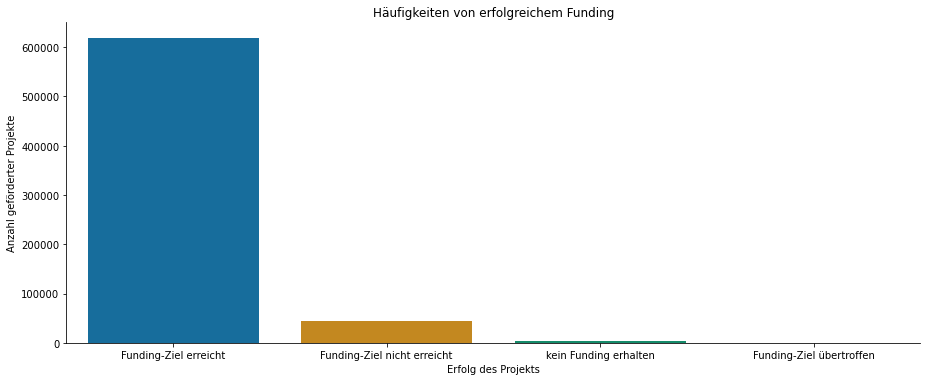

In [5]:
a = sns.catplot(data=df, x ='successful_funding', kind='count', palette='colorblind')
a.fig.set_figwidth(15)

ticklabels = ['Funding-Ziel erreicht', 'Funding-Ziel nicht erreicht', 'kein Funding erhalten', 'Funding-Ziel übertroffen']

plt.xlabel('Erfolg des Projekts')
plt.ylabel('Anzahl geförderter Projekte')
a.set_xticklabels(ticklabels)

plt.title('Häufigkeiten von erfolgreichem Funding')

##### Das Funding-Ziel wurde bei den allermeisten Projekten (über 600.000 Projekte) erreicht. Nur in wenigen Fällen (< 5.000 Fälle) wurde das Funding-Ziel nicht erreicht, d.h. es wurde weniger Geld gefunded als von den Initiatoren als Ziel vorgegeben wurde. Bei einem nur sehr kleinen Prozentsatz der Projekte kam überhaupt kein Funding zustande. In zwei Fällen der knapp 700.000 Projekte wurde das Funding-Ziel sogar übertroffen (mehr Geld eingesammelt als notwendig). In dieser Grafik sind diese kaum ersichtlich, da sie einen verschwindend kleinen Anteil (2.85E-6) an der Gesamtzahl der Projekte ausmachen.

#### b)	Funding-Zielen

In [6]:
df.funded_cluster.unique()

array(['(200, 500]', '(500, 1000]', '(100, 200]', '(2000, 5000]',
       '(1000, 2000]', '(5000, 10000]', '(0, 100]', '(-1, 0]',
       '(10000, 20000]', '(20000, 50000]'], dtype=object)

In [7]:
plot_order = ['(-1, 0]', '(0, 100]', '(100, 200]', '(200, 500]', '(500, 1000]', '(1000, 2000]', '(2000, 5000]',
              '(5000, 10000]', '(10000, 20000]', '(20000, 50000]']

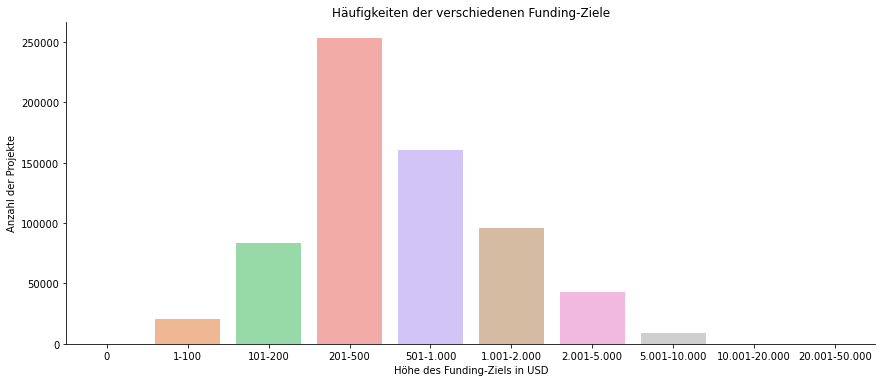

In [8]:
a= sns.catplot(data=df, x ='goal_cluster', kind='count', palette='pastel', order=plot_order)

a.set(ylabel='Anzahl der Projekte', xlabel='Höhe des Funding-Ziels in USD', title='Häufigkeiten der verschiedenen Funding-Ziele')

a.fig.set_figwidth(15)

a.set_xticklabels(['0', '1-100', '101-200', '201-500', '501-1.000', '1.001-2.000', '2.001-5.000', '5.001-10.000', '10.001-20.000', '20.001-50.000'])

#### c)	Funding-Höhen

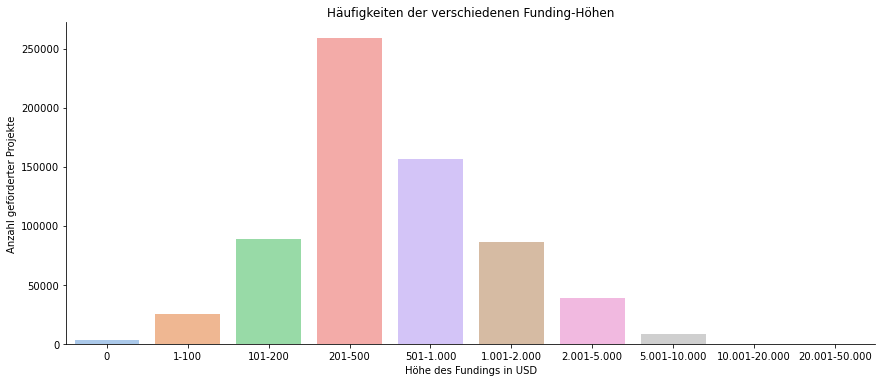

In [9]:
b = sns.catplot(data=df, x ='funded_cluster', kind='count', palette='pastel', order=plot_order)

b.set(ylabel='Anzahl geförderter Projekte', xlabel='Höhe des Fundings in USD', title='Häufigkeiten der verschiedenen Funding-Höhen')

b.fig.set_figwidth(15)

b.set_xticklabels(['0', '1-100', '101-200', '201-500', '501-1.000', '1.001-2.000', '2.001-5.000', '5.001-10.000', '10.001-20.000', '20.001-50.000'])


##### Die Grafiken zeigen, dass die meisten Projekte mit einer Höhe von 201-500 USD angesetzt (Grafik oben) und dann auch finanziert wurden (Grafik unten). Projekte über 5.000 USD sind eher die Seltenheit. Crowd-Funding scheint eher für Projekte mit "kleineren" Beträgen interessant zu sein.
##### Ein Unterschied zwischen beiden Grafiken ist fast nicht erkennbar. Abzulesen in Grafik 2 ist jedoch, dass einige Projekte, die mit einem Betrag über 0 USD angesetzt wurden, offensichtlich kein Funding erhielten.


#### d)	Sektoren

In [10]:
import plotly.express as px

In [11]:
df.sector.value_counts()

Agriculture       179223
Food              135749
Retail            123758
Services           44699
Personal Use       36247
Housing            33571
Clothing           32480
Education          30837
Transportation     15455
Arts               11994
Health              9172
Construction        6194
Manufacturing       6158
Entertainment        820
Wholesale            626
Name: sector, dtype: int64

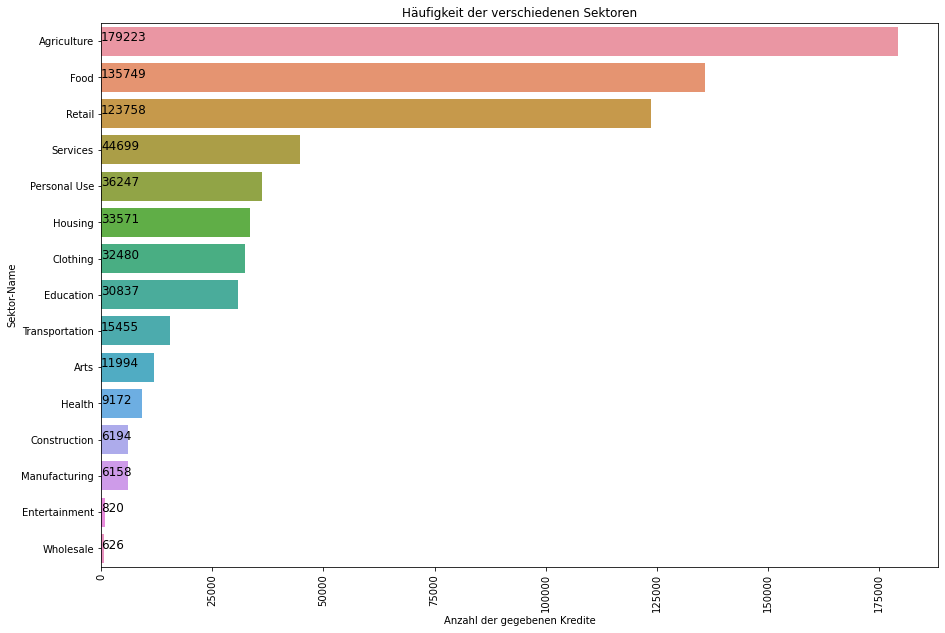

In [12]:
plt.figure(figsize=(15,10))

sector_name = df['sector'].value_counts()

sns.barplot(x = sector_name.values, y = sector_name.index)

for i, v in enumerate(sector_name.values):
    plt.text(1.0,i,v,color='k',fontsize=12)

plt.xticks(rotation='vertical')
plt.xlabel('Anzahl der gegebenen Kredite')
plt.ylabel('Sektor-Name')
plt.title("Häufigkeit der verschiedenen Sektoren")

plt.show()

##### In den Sektoren Agriculture (179.223 Projekte), sowie Food (135.749 Projekte) und Retail (123.758 Projekte) werden mit Abstand die meisten Crowdfunding-Projekte realisiert.

### Gesamt-Funding-Summe aller Projekte je Sektor

In [13]:
sectors = []
funding_per_sector = []

for i in df.sector.unique():
#    print(df.sector)
    a = df.loc[df['sector']==i, 'funded_amount'].sum()
    print(i, a)
    sectors.append(i)
    funding_per_sector.append(a)

Food 114195180
Transportation 9786090
Arts 11717555
Services 42438175
Agriculture 132942720
Manufacturing 5298525
Wholesale 907875
Retail 90203355
Clothing 34535370
Construction 6174600
Health 9119750
Education 29866945
Personal Use 14127475
Housing 21253450
Entertainment 1000645


In [14]:
print(sectors)
print(funding_per_sector)

['Food', 'Transportation', 'Arts', 'Services', 'Agriculture', 'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction', 'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment']
[114195180, 9786090, 11717555, 42438175, 132942720, 5298525, 907875, 90203355, 34535370, 6174600, 9119750, 29866945, 14127475, 21253450, 1000645]


In [15]:
fig = px.pie(
    data_frame=df, 
    values=funding_per_sector, 
    names=sectors, 
    title='Total Funding Amount in percent per Sector',
    hole=0.5)

fig.show()

In [16]:
sum(funding_per_sector)

523567710

##### Insgesamt wurden 523 Mio. USD Gelder in verschiedenste Projekte investiert.
##### Davon wurde mit knapp 133 Mio. USD (siehe Hover-Effekt) bzw. 25,4% der insgesamte investierten Gelder am meisten Geld in den Sektor Agriculture investiert. Gefolgt wird der Sektor Agriculture von den Sektoren Food mit 114 Mio. USD (21,8% aller Fundings in USD) und Retail mit 90 Mio. USD (17,2%). Die übrigen Sektoren machen weniger als 50% an der Gesamtfunding-Summe aus.


#### e)	Ländern

#### Länder mit den meisten Projekten

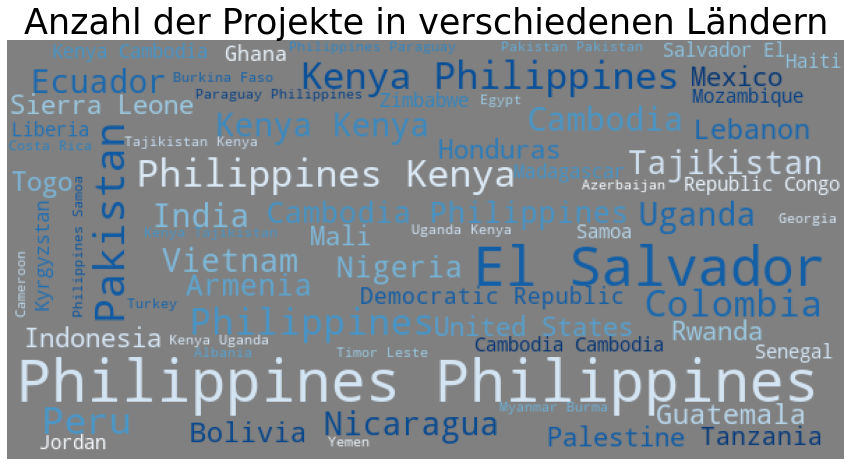

In [17]:
from wordcloud import WordCloud

names = df.country

wordcloud = WordCloud(max_font_size=50, width=600, height=300, min_font_size=10, background_color="grey", colormap="Blues").generate(' '.join(names))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Anzahl der Projekte in verschiedenen Ländern", fontsize=35)
plt.axis("off")
plt.show()

##### Die Größe und Häufigkeit des Landes Philippinen wie auch El Salvador und Kenya zeigen, dass hier viele Projekte finanziert werden.

#### Anzahl der Top 10 Länder

In [19]:
df_counts = df.country.value_counts()
df_counts

Philippines       160361
Kenya              75113
El Salvador        39321
Cambodia           34811
Pakistan           26853
                   ...  
Virgin Islands         2
Mauritania             1
Bhutan                 1
Guam                   1
Cote D'Ivoire          1
Name: country, Length: 87, dtype: int64

In [20]:
df_top10 = df_counts[0:10]
df_top10

Philippines    160361
Kenya           75113
El Salvador     39321
Cambodia        34811
Pakistan        26853
Peru            22179
Colombia        21218
Uganda          20390
Tajikistan      19518
Ecuador         13487
Name: country, dtype: int64

In [21]:
df_top10.keys()

Index(['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan', 'Peru',
       'Colombia', 'Uganda', 'Tajikistan', 'Ecuador'],
      dtype='object')

In [22]:
df_top10.values

array([160361,  75113,  39321,  34811,  26853,  22179,  21218,  20390,
        19518,  13487], dtype=int64)

In [23]:
fig = px.pie(
    data_frame=df_top10, 
    values=df_top10.values, 
    names=df_top10.keys(), 
    title='Anzahl an Projekten der Top 10 Länder',
    hole=0.5)

fig.show()

##### In den Philippinen und Kenya finden mit 37% aller Projekte (160.361 Stück) respektive 17,3% (75.113 Stück) mit Abstand die meisten Crowdfunding-Projekte statt!

#### Alternativer Plot, falls man etwas mehr Länder anzeigen will:

#### Mit plotly express:

In [24]:
df_countrycount = df.country.value_counts()
df_countrycount

Philippines       160361
Kenya              75113
El Salvador        39321
Cambodia           34811
Pakistan           26853
                   ...  
Virgin Islands         2
Mauritania             1
Bhutan                 1
Guam                   1
Cote D'Ivoire          1
Name: country, Length: 87, dtype: int64

In [25]:
df_top20 = df_countrycount[0:20]
df_top20

Philippines    160361
Kenya           75113
El Salvador     39321
Cambodia        34811
Pakistan        26853
Peru            22179
Colombia        21218
Uganda          20390
Tajikistan      19518
Ecuador         13487
Paraguay        11841
Nicaragua       11676
India           11194
Vietnam         10841
Nigeria         10130
Lebanon          8776
Bolivia          8732
Armenia          8628
Palestine        8152
Samoa            7372
Name: country, dtype: int64

In [26]:
# Variante 1 mit Plotly Express:

fig = px.bar(df_top20, 
             x=df_top20.keys(), 
             y=df_top20.values, 
             title='Top 20 Countries with most projects',
             labels={'y':'Number of Projects', 'index': 'Countries'}, 
             height=500)
fig.show()

#### Mit Matplotlib

Text(0.5, 1.0, 'Top 20 Countries with most projects')

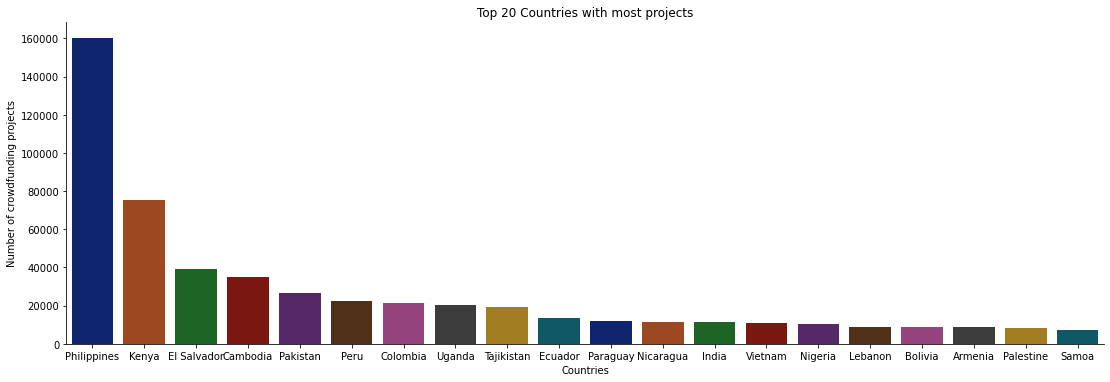

In [27]:
# Variante 2 mit Seaborn catplot:

a = sns.catplot(data=df_top20, y =df_top20.values, x=df_top20.keys(), kind="bar",palette='dark', order=df_countrycount[0:20] )

a.fig.set_figwidth(18)

plt.xlabel('Countries')
plt.ylabel('Number of crowdfunding projects')
a.set_xticklabels(df_top20.keys())
plt.title('Top 20 Countries with most projects')

##### Auch die Balkendiagramme zeigen, dass in den Philippinen und Kenya mit Abstand die meisten Crowdfunding-Projekte stattfinden. Scheinbar wird Crowdfunding hauptsächlich von Schwellen- und Entwicklungsländern genutzt. Das spielt sich auch in der Häufung von niedrig Funding-Zielen (am meisten zwischen 200-500 USD) wieder.

#### f)	Auszahlungsintervallen

#### Häufigkeiten der Auszahlungsintervalle

<AxesSubplot:title={'center':'Häufigkeiten der Auszahlungsintervalle'}>

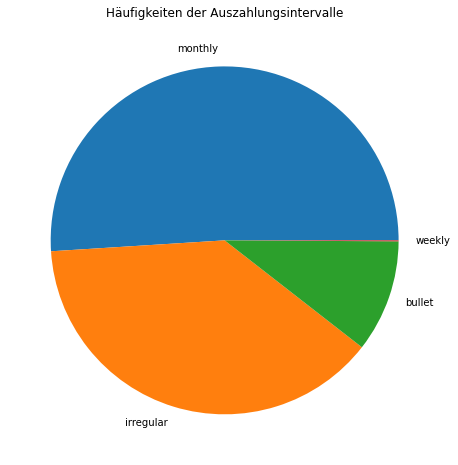

In [28]:
df.repayment_interval.value_counts().plot(kind="pie",figsize=(8,8), ylabel='', 
                                          title='Häufigkeiten der Auszahlungsintervalle')

##### Die Fundings werden ca. zur Hälfte in monatlichen Rückzahlungsintervallen zurückgezahlt. Eine unregelmäßiges Rückzahlungsintervall ist mit ca. 30% am zweithäufigsten vertreten. Am seltensten ist die wöchentliche Rückzahlung. Rückzahlungen als Einmalzahlung sind mit ca. 10% vertreten.

#### g)	Geschlechterzusammensetzung der Initiatoren-Teams

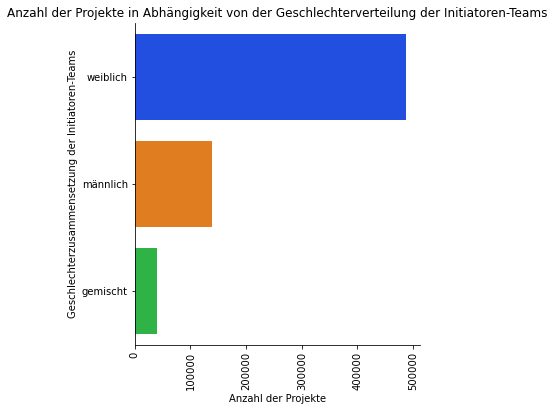

In [29]:
a = sns.catplot(data=df, y ='gender_initiators', kind='count', palette='bright')

plt.xticks(rotation='vertical')
plt.xlabel('Anzahl der Projekte')
plt.ylabel('Geschlechterzusammensetzung der Initiatoren-Teams')
plt.title('Anzahl der Projekte in Abhängigkeit von der Geschlechterverteilung der Initiatoren-Teams')
#set_xticklabels(['df_top20.keys()'])
ticklabels=['weiblich', 'männlich', 'gemischt']
a.set_yticklabels(ticklabels)

##### Der Plot zeigt, dass die meisten Projekte von reinen Frauenteams geleitet werden.

#### h)	Anzahl der Kreditgeber

In [30]:
print("Anzahl der Kreditgeber, die zum Darlehen beitragen : ", len(df["lender_count"].unique()))
print(df["lender_count"].value_counts().head(10))

Anzahl der Kreditgeber, die zum Darlehen beitragen :  498
8     34059
7     32381
9     32325
1     31823
5     30305
6     29295
10    28048
11    25759
12    25193
4     24448
Name: lender_count, dtype: int64


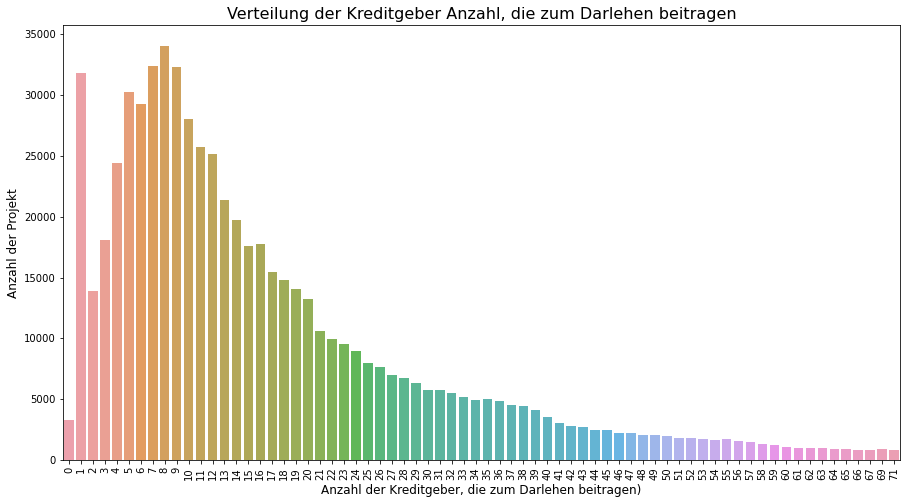

In [31]:
lender = df['lender_count'].value_counts().head(70)
plt.figure(figsize=(15,8))
sns.barplot(x = lender.index, y = lender.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Anzahl der Kreditgeber, die zum Darlehen beitragen)', fontsize=12)
plt.ylabel('Anzahl der Projekt', fontsize=12)
plt.title("Verteilung der Kreditgeber Anzahl, die zum Darlehen beitragen", fontsize=16)
plt.show()

##### Die Verteilung ist stark verzerrt: Die meisten Projekte haben 8 Kreditgeber. Auffällig ist, dass auch Projekte mit einem Kreditgeber besonders häufig sind.

## Frage 2: Wovon hängen der Erfolg und die Höhe des Fundings ab? 
### Fokussiert wurde dabei auf die Frage, welchen Einfluss die Größe und Geschlechterzusammensetzung des Initiatoren-Teams auf das Funding bzw. den Erfolg des Fundings hatte. 

### 1.	Sind teurere oder billigere Projekte erfolgreicher? 

#### Funding-Ziel in Abhängigkeit vom Erfolg

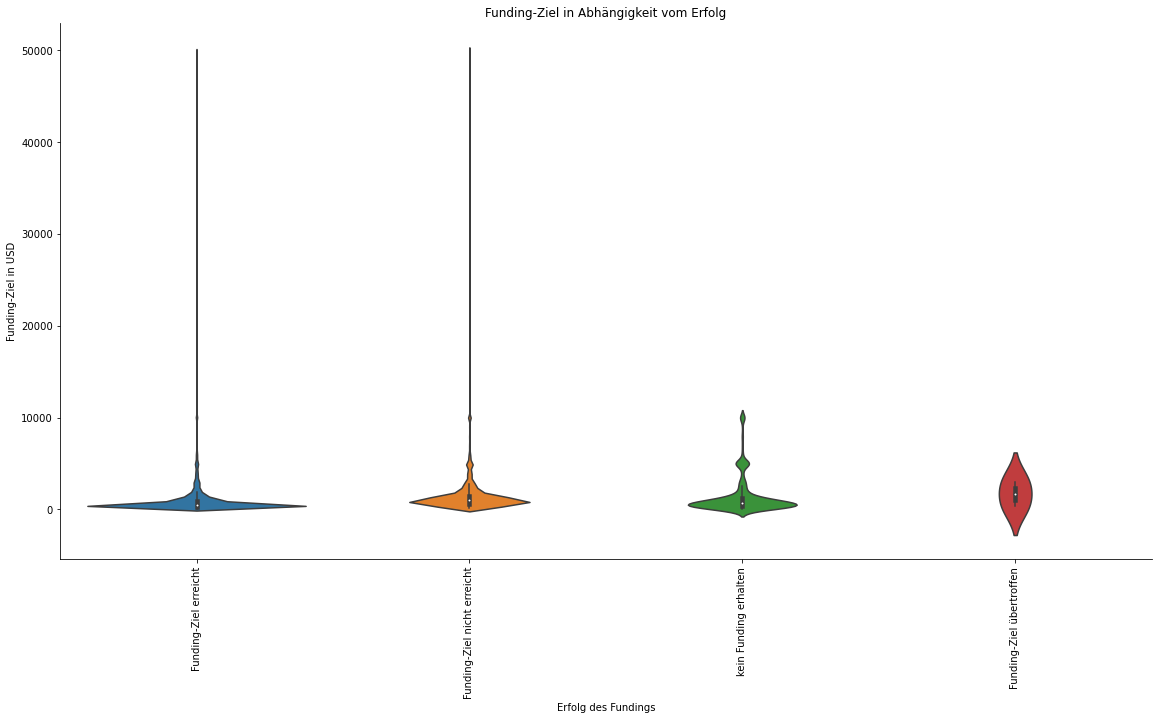

In [32]:
a = sns.catplot(data=df, x="successful_funding", y='funding_goal', kind="violin",height=8, aspect=2)

plt.xticks(rotation='vertical')
plt.xlabel('Erfolg des Fundings')
plt.ylabel('Funding-Ziel in USD')
plt.title("Funding-Ziel in Abhängigkeit vom Erfolg")
#set_xticklabels(['df_top20.keys()'])
ticklabels=['Funding-Ziel erreicht', 'Funding-Ziel nicht erreicht', 'kein Funding erhalten', 'Funding-Ziel übertroffen']
a.set_xticklabels(ticklabels)

Die Grafik zeigt, dass es klare Häufungen bei Projekten mit niedrigerem Funding-Ziel gibt. Bei besonders hohem Funding-Ziel wurde immer ein Funding gegeben: entweder in voller Höhe (= Funding-Ziel erreicht) oder ein geringerer Betrag finanziert (Funding-Ziel nicht erreicht). 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666983 entries, 0 to 671204
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       666983 non-null  int64  
 1   funded_cluster      666983 non-null  object 
 2   funding_goal        666983 non-null  int64  
 3   goal_cluster        666983 non-null  object 
 4   successful_funding  666983 non-null  object 
 5   success_factor      666983 non-null  float64
 6   activity            666983 non-null  object 
 7   sector              666983 non-null  object 
 8   use_description     666983 non-null  int64  
 9   country             666983 non-null  object 
 10  partner_id          666983 non-null  object 
 11  lender_count        666983 non-null  int64  
 12  count_male          666983 non-null  int64  
 13  count_female        666983 non-null  int64  
 14  count_initiators    666983 non-null  int64  
 15  gender_initiators   666983 non-nul

In [34]:
df.corr()

funded_amount  funding_goal  success_factor  \
funded_amount          1.000000      0.951356        0.077002   
funding_goal           0.951356      1.000000       -0.121122   
success_factor         0.077002     -0.121122        1.000000   
use_description        0.001062     -0.005642        0.011301   
lender_count           0.846231      0.801070        0.083625   
count_male             0.197733      0.209509       -0.071466   
count_female           0.471089      0.445504        0.045851   
count_initiators       0.484519      0.465588        0.017410   

                  use_description  lender_count  count_male  count_female  \
funded_amount            0.001062      0.846231    0.197733      0.471089   
funding_goal            -0.005642      0.801070    0.209509      0.445504   
success_factor           0.011301      0.083625   -0.071466      0.045851   
use_description          1.000000      0.001746   -0.001473     -0.002226   
lender_count             0.001746      1.000000    0.171947      0.265933   
count_male              -0.001473      0.171947    1.000000      0.169129   
count_female            -0.002226      0.265933    0.169129      1.000000   
count_initiators        -0.002466      0.293298    0.478620      0.946322   

                  count_initiators  
funded_amount             0.484519  
funding_goal              0.465588  
success_factor            0.017410  
use_description          -0.002466  
lender_count              0.293298  
count_male                0.478620  
count_female              0.946322  
count_initiators          1.000000

### 2.	Welchen Einfluss haben die Eigenschaften des Initiatoren-Teams auf das Funding?

#### a)	Welchen Einfluss hat die Anzahl der Initiatoren?

Text(0.5, 1.0, 'Durschnittliche Anzahl an Initiatoren in Abhängigkeit vom Erfolg des Fundings')

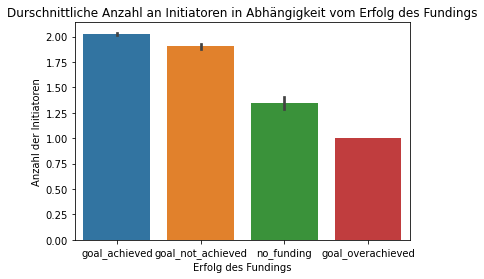

In [35]:
sns.barplot(data=df, x='successful_funding', y='count_initiators')

plt.xlabel('Erfolg des Fundings')
plt.ylabel('Anzahl der Initiatoren')
plt.title('Durschnittliche Anzahl an Initiatoren in Abhängigkeit vom Erfolg des Fundings')

##### Die Projekte, die ihr Funding-Ziel erreichten hatten im Schnitt am meisten Initiatoren. Die Projekte, die kein Funding erhielten, hatten im Durchschnitt weniger Initiatoren. Projekte, die sogar mehr Geld erhielten, als sie brauchten wurden immer von einer Person initiiert (mean=1)!

#### Höhe des Fundings-Ziels

In [38]:
df_neu = df[df.count_initiators<=10]

Text(0.5, 1.0, 'Höhe des Funding-Ziels in Abhängigkeit von der Anzahl der Initiatoren und dem Erfolg des Fundings')

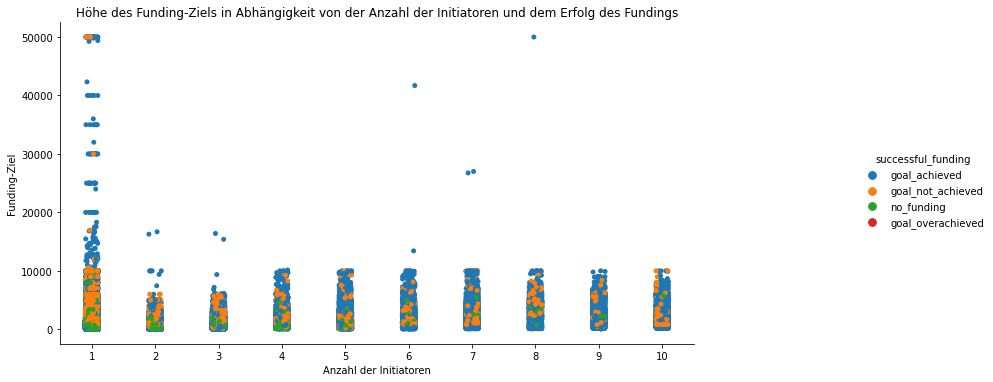

In [39]:
a =sns.catplot(x="count_initiators", y="funding_goal", data=df_neu, hue='successful_funding')
a.fig.set_figwidth(15)
plt.xlabel('Anzahl der Initiatoren')
plt.ylabel('Funding-Ziel')
plt.title('Höhe des Funding-Ziels in Abhängigkeit von der Anzahl der Initiatoren und dem Erfolg des Fundings')

##### Hier wurden nur die Gruppengrößen mit 10 Initiatoren betrachtet, da eine vorherige Betrachtung aller Gruppengrößen zeigte, dass die größten Auffälligkeiten in diesem Bereich zu finden sind. Das Funding-Ziel scheint am häufigsten bei Gruppengrößen zwischen 5 und 7 erreicht worden zu sein. 

####  Gezahltes Funding in Abhängigkeit der Anzahl der Initiatoren und Erfolg des Fundings

<AxesSubplot:xlabel='count_initiators', ylabel='funded_amount'>

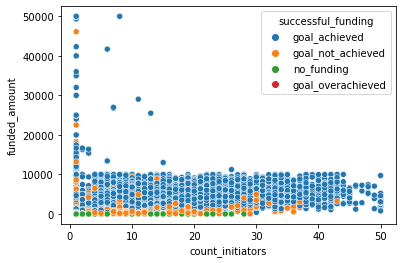

In [40]:
sns.scatterplot(x=df.count_initiators, y=df.funded_amount, hue=df.successful_funding, legend='auto')

C:\Users\Alfa\anaconda3new\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Alfa\anaconda3new\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



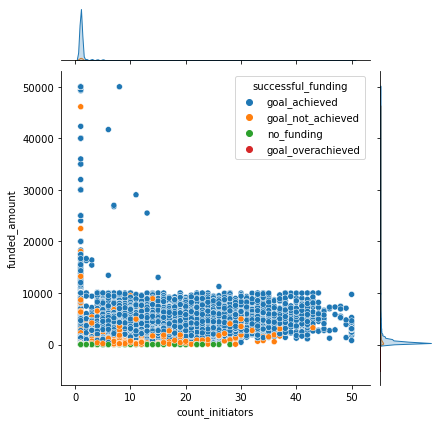

In [41]:
sns.jointplot(x=df.count_initiators, y=df.funded_amount, hue=df.successful_funding)

##### Obwohl es sehr wenige Projekte über 10.000 USD gibt, häufen sich diese bei wenigen Initiatoren. Die meisten Projekte liegen unter 10.000 USD. Bei sehr vielen Initiatoren (mehr als 30) kam immer ein Funding zustande, scheinbar jedoch nur im Bereich bis 10.000 USD. 
##### Es wäre in einer weiteren Analyse sicherlich noch sinnvoll, sich nur die Projekte unterhalb von 10.000 USD anzusehen, da wir es hier mit besonders vielen Projekten zu tun haben. Einen ersten Überblick biete dieser Pairplot, auf den wegen weiterer Fragestellungen jedoch nicht weiter eingegangen wurde:


#### Ansehen der funded_amounts kleiner 10.000 USD

In [42]:
df.funded_amount.value_counts()

225      34241
300      30565
200      27366
500      27129
250      26622
         ...  
90           1
11025        1
49925        1
3870         1
1785         1
Name: funded_amount, Length: 598, dtype: int64

In [43]:
df.describe()

funded_amount   funding_goal  success_factor  use_description  \
count  666983.000000  666983.000000   666983.000000    666983.000000   
mean      784.979092     840.152073        0.961130         0.999984   
std      1121.439841    1181.689078        0.157316         0.004061   
min         0.000000      25.000000        0.000000         0.000000   
25%       250.000000     275.000000        1.000000         1.000000   
50%       450.000000     500.000000        1.000000         1.000000   
75%       900.000000    1000.000000        1.000000         1.000000   
max     50000.000000   50000.000000        1.133333         1.000000   

        lender_count     count_male   count_female  count_initiators  
count  666983.000000  666983.000000  666983.000000     666983.000000  
mean       20.546429       0.412160       1.606198          2.018359  
std        28.132858       1.119501       3.041056          3.413633  
min         0.000000       0.000000       0.000000          1.000000  
25%         7.000000       0.000000       1.000000          1.000000  
50%        13.000000       0.000000       1.000000          1.000000  
75%        24.000000       1.000000       1.000000          1.000000  
max      1765.000000      44.000000      50.000000         50.000000

In [44]:
df_new = df.loc[df.funding_goal <= 10000]
df_new

funded_amount funded_cluster  funding_goal goal_cluster  \
0                 300     (200, 500]           300   (200, 500]   
1                 575    (500, 1000]           575  (500, 1000]   
2                 150     (100, 200]           150   (100, 200]   
3                 200     (100, 200]           200   (100, 200]   
4                 400     (200, 500]           400   (200, 500]   
...               ...            ...           ...          ...   
671199              0        (-1, 0]            25     (0, 100]   
671200              0        (-1, 0]            25     (0, 100]   
671201             25       (0, 100]            25     (0, 100]   
671203              0        (-1, 0]            25     (0, 100]   
671204              0        (-1, 0]            25     (0, 100]   

       successful_funding  success_factor             activity  \
0           goal_achieved             1.0  Fruits & Vegetables   
1           goal_achieved             1.0             Rickshaw   
2           goal_achieved             1.0       Transportation   
3           goal_achieved             1.0           Embroidery   
4           goal_achieved             1.0           Milk Sales   
...                   ...             ...                  ...   
671199         no_funding             0.0            Livestock   
671200         no_funding             0.0            Livestock   
671201      goal_achieved             1.0            Livestock   
671203         no_funding             0.0            Livestock   
671204         no_funding             0.0            Livestock   

                sector  use_description   country partner_id  lender_count  \
0                 Food                1  Pakistan      247.0            12   
1       Transportation                1  Pakistan      247.0            14   
2       Transportation                1     India      334.0             6   
3                 Arts                1  Pakistan      247.0             8   
4                 Food                1  Pakistan      245.0            16   
...                ...              ...       ...        ...           ...   
671199     Agriculture                1  Paraguay       58.0             0   
671200     Agriculture                1  Paraguay       58.0             0   
671201     Agriculture                1     Kenya      138.0             1   
671203     Agriculture                1     Kenya      138.0             0   
671204     Agriculture                1     Kenya      138.0             0   

        count_male  count_female  count_initiators gender_initiators  \
0                0             1                 1            female   
1                0             2                 2            female   
2                0             1                 1            female   
3                0             1                 1            female   
4                0             1                 1            female   
...            ...           ...               ...               ...   
671199           0             1                 1            female   
671200           0             1                 1            female   
671201           0             1                 1            female   
671203           0             1                 1            female   
671204           0             1                 1            female   

       repayment_interval  
0               irregular  
1               irregular  
2                  bullet  
3               irregular  
4                 monthly  
...                   ...  
671199            monthly  
671200            monthly  
671201            monthly  
671203            monthly  
671204            monthly  

[666811 rows x 17 columns]

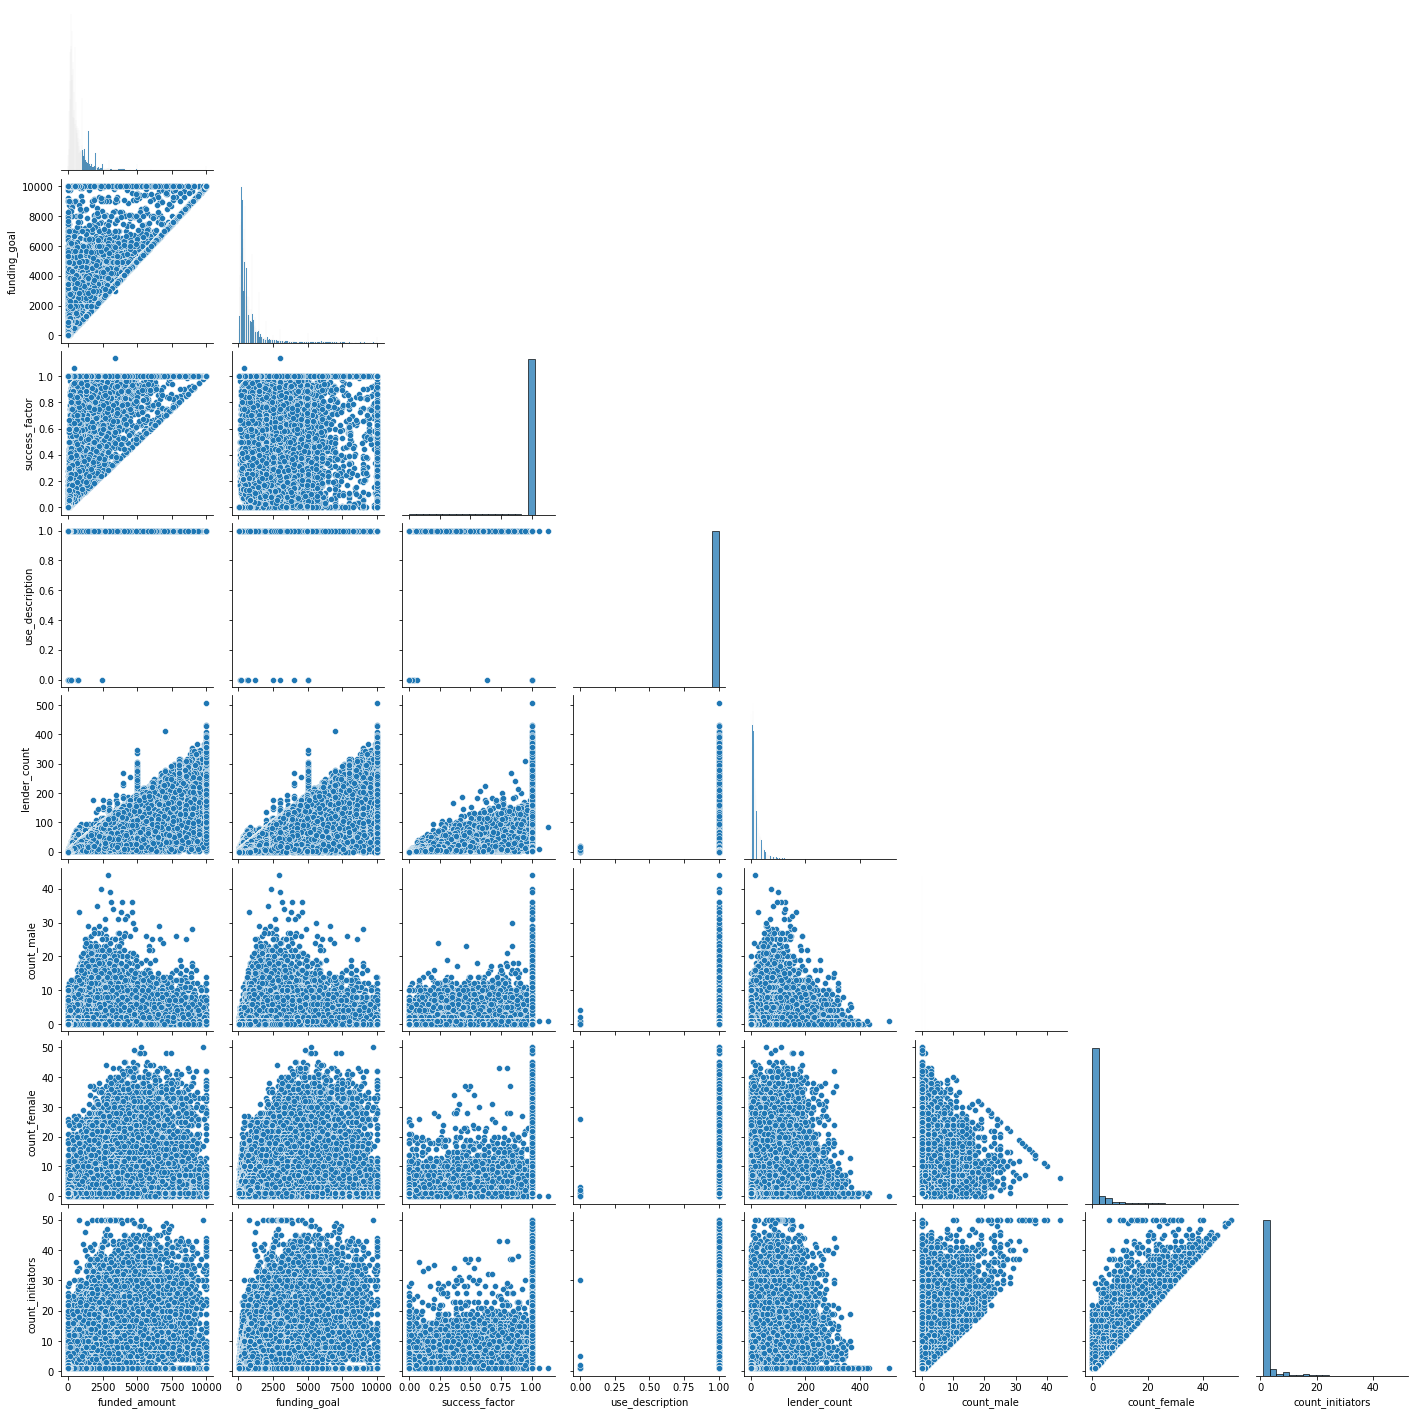

In [45]:
sns.pairplot(data=df_new, corner=True)

#### b)	Welchen Einfluss hat die Geschlechter-Zusammensetzung des Initiatoren-Teams?

In [46]:
#df['gender_initiators'] = gender_data[0]

# df.loc[df.gender_initiators == 'nan', 'gender_initiators'] = np.nan
df_sex_mean = pd.DataFrame(df.groupby(['gender_initiators'])['funded_amount'].mean().sort_values(ascending=False)).reset_index()
print(df_sex_mean)

  gender_initiators  funded_amount
0             mixed    1816.681526
1              male     797.314814
2            female     696.122910


[Text(0, 0, 'gemischt-geschlechtlich'),
 Text(1, 0, 'männnlich'),
 Text(2, 0, 'weiblich')]

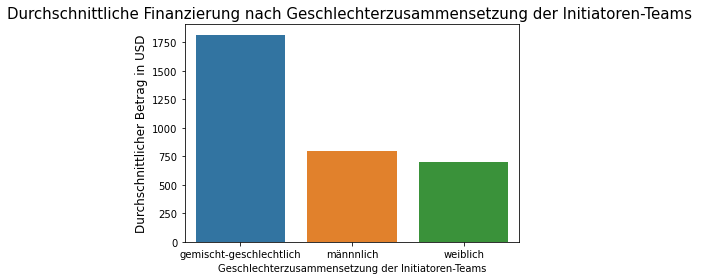

In [47]:
a = sns.barplot(x='gender_initiators', y='funded_amount', data=df_sex_mean, ci=95)
a.set_title("Durchschnittliche Finanzierung nach Geschlechterzusammensetzung der Initiatoren-Teams ", fontsize=15)
a.set_xlabel("Geschlechterzusammensetzung der Initiatoren-Teams")
a.set_ylabel("Durchschnittlicher Betrag in USD", fontsize=12)

ticklabels=['gemischt-geschlechtlich', 'männnlich', 'weiblich']
a.set_xticklabels(ticklabels)

##### Die Grafik zeigt, dass gemischt-geschlechtliche Teams im Durchschnitt höhere Finanzierungen erhalten als rein männliche oder rein weibliche Teams. Weibliche Teams fahren dabei im Durchschnitt die geringsten Finanzierungsbeträge ein. 

#### c)	Welchen Einfluss haben Anzahl der Initiatoren in Kombination mit der Geschlechter-Zusammensetzung?

Text(0.5, 1.0, 'Anzahl an Intiatoren bei unterschiedlich "teuren" Projekten')

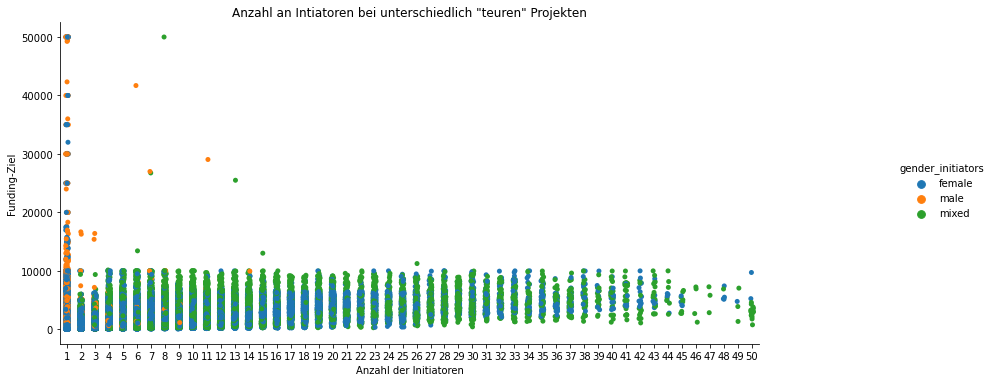

In [48]:
a =sns.catplot(x="count_initiators", y="funding_goal", data=df, hue='gender_initiators')
a.fig.set_figwidth(15)
plt.xlabel('Anzahl der Initiatoren')
plt.ylabel('Funding-Ziel')
plt.title('Anzahl an Intiatoren bei unterschiedlich "teuren" Projekten')

##### Der Plot zeigt, dass Projekte, die über 10.000 USD benötigen, vorwiegend von einer Person geleitet wurden. Interessant ist, dass Männer sich das scheinbar eher zutrauen: unter den alleinigen Projektleitern und denen, die hohe Beträge benötigen häufigen sich die Männer! Frauen und gemischte Teams leiten dafür viele Projekte. Das entspricht auch psychologischen Erkenntnissen, dass sich Männer im Schnitt mehr zutrauen als Frauen und Frauen im Schnitt bessere Team-Player sind.

#### Diese Vergrößerung des Plots zeigt das sehr deutlich:

In [49]:
df_neu = df[df.count_initiators<=10]

Text(0.5, 1.0, 'Anzahl an Intiatoren bei unterschiedlich "teuren" Projekten')

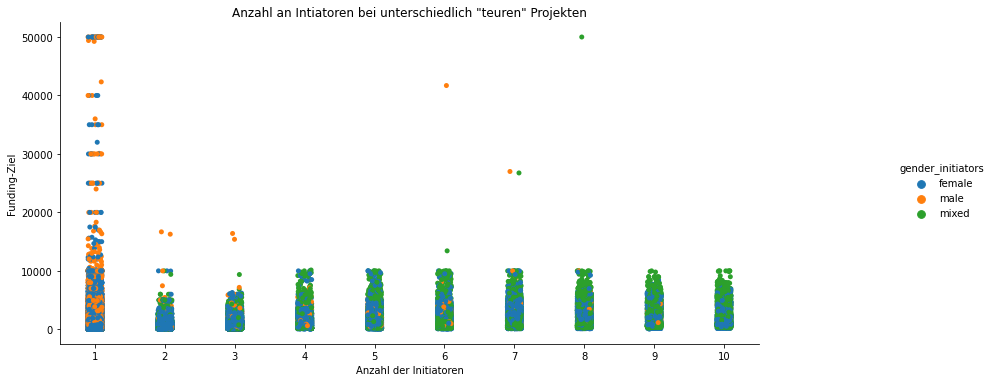

In [50]:
a =sns.catplot(x="count_initiators", y="funding_goal", data=df_neu, hue='gender_initiators')
a.fig.set_figwidth(15)
plt.xlabel('Anzahl der Initiatoren')
plt.ylabel('Funding-Ziel')
plt.title('Anzahl an Intiatoren bei unterschiedlich "teuren" Projekten')

##  Frage 3:  Zeigen sich in der Teamzusammensetzung der Initiatoren-Teams Muster? 

<AxesSubplot:xlabel='count_initiators', ylabel='gender_initiators'>

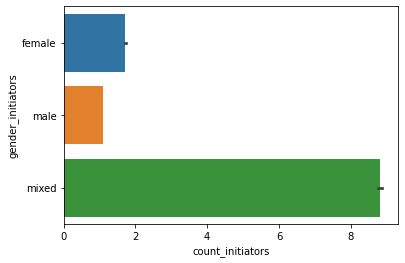

In [51]:
sns.barplot(x=df.count_initiators, y=df.gender_initiators)

##### Rein weibliche Teams bestehen maximal aus 2 Frauen. Davon scheint es aber sehr viele zu geben (siehe Grafik darüber!). Männer arbeiten entweder alleine oder in gemischt-geschlechtlichen Teams, jedoch nie in reinen Männer-Teams! Teams mit mehr als 2 Mitgliedern sind stets gemischt-geschlechtlich.